# Phân tích khám phá về chất lượng rượu vang đỏ (Red Wine Quality)


## 1. Định nghĩa vấn đề (Define Problem)
- **Mô tả**:
    - Tập “Red Vinho Verde” (Bồ Đào Nha) thuộc bộ Wine Quality gốc UCI, được mirror trên Kaggle. Dữ liệu chỉ gồm thử nghiệm hoá lý và điểm cảm quan “quality”.
+ **Dữ liệu vào**:
    - fixed acidity - axit cố định 
    - volatile acidity - axit bay hơi
    - citric acid - axit citric
    - residual sugar - đường dư 
    - chlorides - Ion Clorua
    - free sulfur dioxide - SO2 chưa liên kết 
    - total sulfur dioxide - Tổng SO2 
    - density - khối lượng riêng của rượu
    - pH - mức đô axit/bazo của rượu
    - sulphates - hàm lượng ion sunfat trong rượu
    - alcohol - lượng ethanol theo thể tích trong rượu
+ **Kết quả**: quality (3-8)

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [35]:
# Importing all import python libraries
import pandas as pd
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2. Nạp dữ liệu (Load Dataset)

In [36]:
winequality_df = pd.read_csv("winequality-red.csv")
winequality_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- Edit those columns (ex: fixed acidity -> fixed_acidity )

### 2.3. Thay đổi tên cột (Columns name change)

In [37]:
# winequality_df = winequality_df.rename(columns={"fixed acidity": "fixed_acidity"}) #single

cols_to_fix = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "free sulfur dioxide", "total sulfur dioxide"]
def normalize_selected_cols(df, cols):
    mapping = {c:c.strip().lower().replace(" ", "_") for c in cols}
    return df.rename(columns = mapping)

winequality_df = normalize_selected_cols(winequality_df, cols_to_fix)
winequality_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [38]:
# shape
print(f'+ Shape: {winequality_df.shape}')
# head, tail
print(f'+ Contents: ')
display.display(winequality_df.head(5))
display.display(winequality_df.tail(5))
# info
winequality_df.info()

+ Shape: (1599, 12)
+ Contents: 


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Nhận xét**:
+ Dữ liệu có 11 tính chất để phân lớp: Fixed acidity (g/L), Volatile acidity (g/L), Citric acid (g/L), Residual sugar (g/L), Chlorides (g/L), Free sulfur dioxide (mg/L), Total sulfur dioxide (mg/L)(mg/L), Density (g/cm³), pH, Sulphates (g/L), Alcohol (%)    
+ Tổng số dòng dữ liệu là 1599 dòng
+ Dữ liệu để phân lớp ở cột **quality** 

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [39]:
has_null = winequality_df.isnull().sum().any()
has_nan  = winequality_df.isna().sum().any()
n_duplicated = winequality_df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(winequality_df[winequality_df.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(winequality_df[winequality_df.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')

if n_duplicated > 0:
    n_duplicated_rows = winequality_df[winequality_df.duplicated(keep=False)]
    display.display(n_duplicated_rows)

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 240


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


**Nhận xét**:
+ Dữ liệu có 244 bị trùng và không có giá trị rỗng (NaN, Null)

Xu lý:
winequality_df = winequality_df.drop_duplicates(keep="first").reset_index(drop=True)


#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [40]:
winequality_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Nhận xét**:
+ fixed_acidity (7.9 < 8.32), volatile_acidity (0.52 < 0.528), citric_acid (0.26 < 0.27), residual_sugar (2.2 < 2.54), chlorides (0.08 < 0.09), free_SO2 (14 < 15.9), total_SO2 (38 < 46.47), sulphates (0.62 < 0.66), alcohol (10.2 < 10.42) → nhiều biến có khả năng đuôi phải. </br>
+ density (0.9), pH (3.3) → cân bằng </br>
+ quality (6 > 5.63) → có khả năng lệch trái

#### (4) **Các giá trị duy nhất ở mỗi cột**

1) Fixed acidity

In [41]:
np.sort(winequality_df["fixed_acidity"].unique())

array([ 4.6,  4.7,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,
        5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,
        6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,
        8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,
        9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1,
       10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2,
       11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3,
       12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.2, 13.3, 13.4, 13.5,
       13.7, 13.8, 14. , 14.3, 15. , 15.5, 15.6, 15.9])

**Nhận xét:** 
- Phạm vi tiêu chuẩn fixed_acidity[4,12] là phạm vi tiêu chuẩ là hợp lý. Tuy nhiên số lần đẻ 17 lần về sinh học có thể coi là đa sản.

In [42]:
np.sort(winequality_df["quality"].unique())

array([3, 4, 5, 6, 7, 8], dtype=int64)

#### (5) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

In [43]:
winequality_df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

**Nhận xét**:
-	Dữ liệu phục vụ bài toán phân loại nhị phân (mắc/không mắc đái tháo đường).
-	Phân bố lớp mất cân bằng, trong đó nhóm không mắc chiếm tỷ trọng lớn khoảng gấp đôi nhóm mắc.


### 1. **Mối tương quan giữa các tính chất (Correlations)**

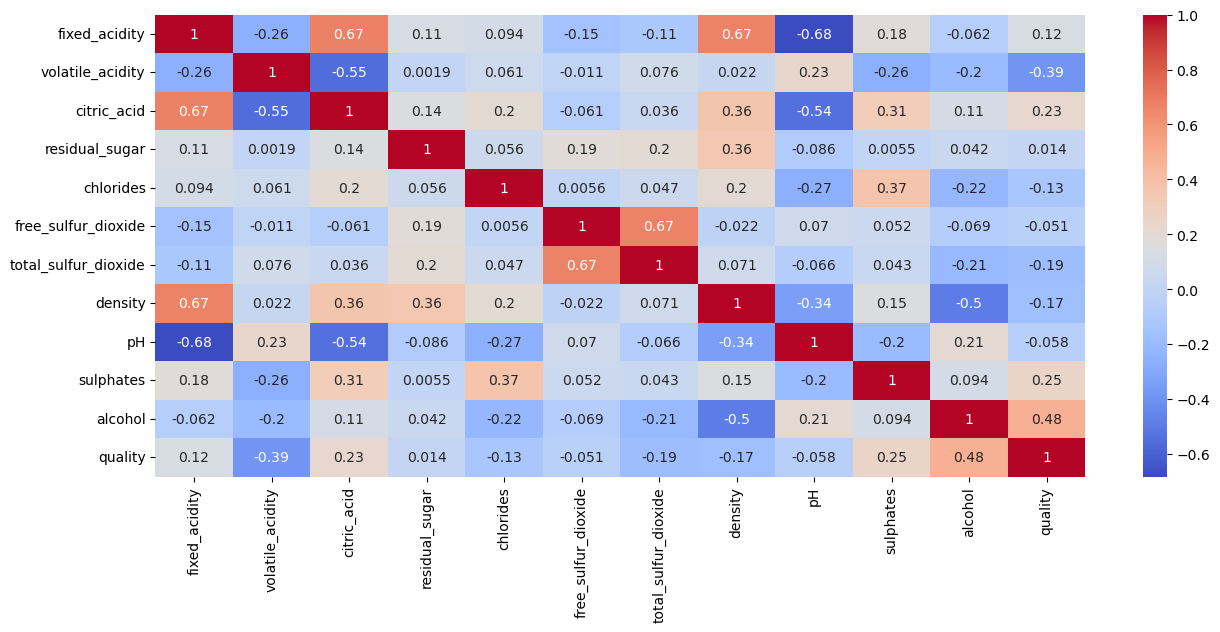

In [49]:
plt.figure(figsize=(15, 6)) #Create canvas
sns.heatmap(winequality_df.corr(), annot= True, cmap="coolwarm")
plt.show() 

**Nhận xét:** </br>
Tương quan cao
- fixed_acidity - citric_acid (0.67)
- fixed_acidity - density (0.67)
- volatile_acidity - pH (0.23)
- citric_acid - chlorides (0.20)
- citric_acid - density (0.36)
- citric_acid - sulphates (0.31)
- citric_acid - quality (0.23)
- residual_sugar - freeSO2 (0.19)
- residual_sugar - totalSO2 (0.20)
- residual_sugar - density (0.36)
- chlorides - sulphates (0.37)
- chlorides - density (0.20)
- totalSO2 - freeSO2 (0.67)
- pH - ancohol (0.21)
- alcohol - quality (0.25)

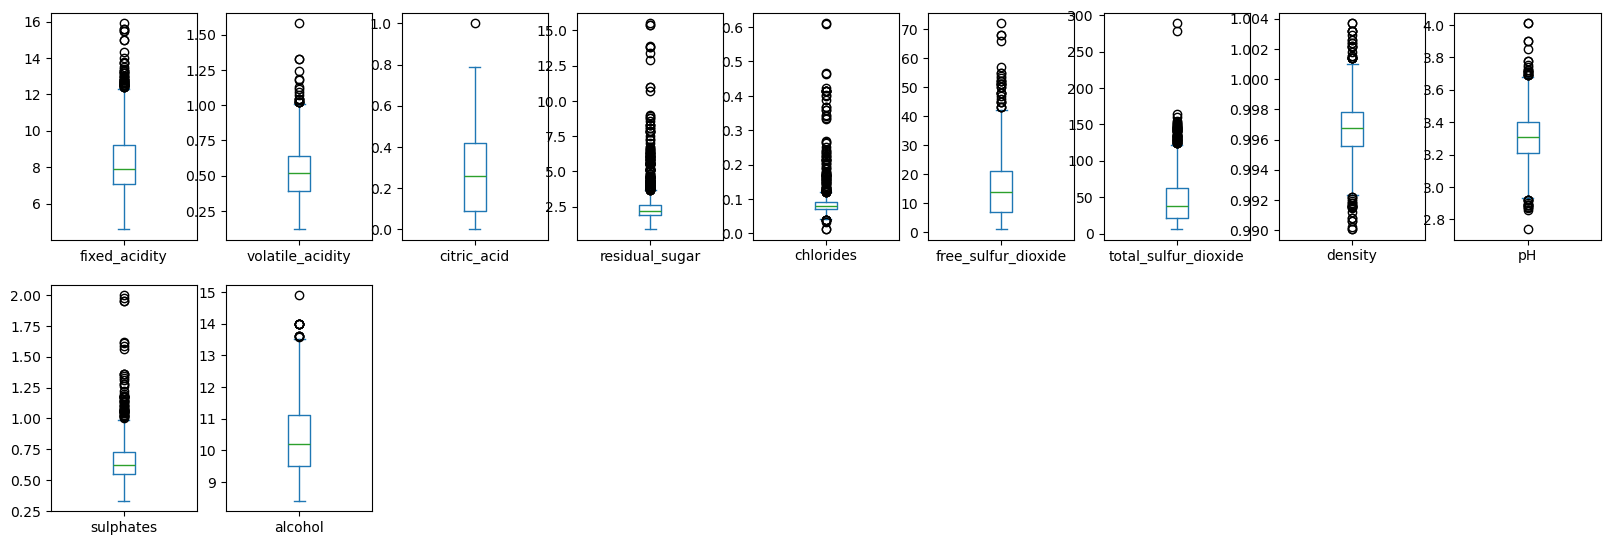

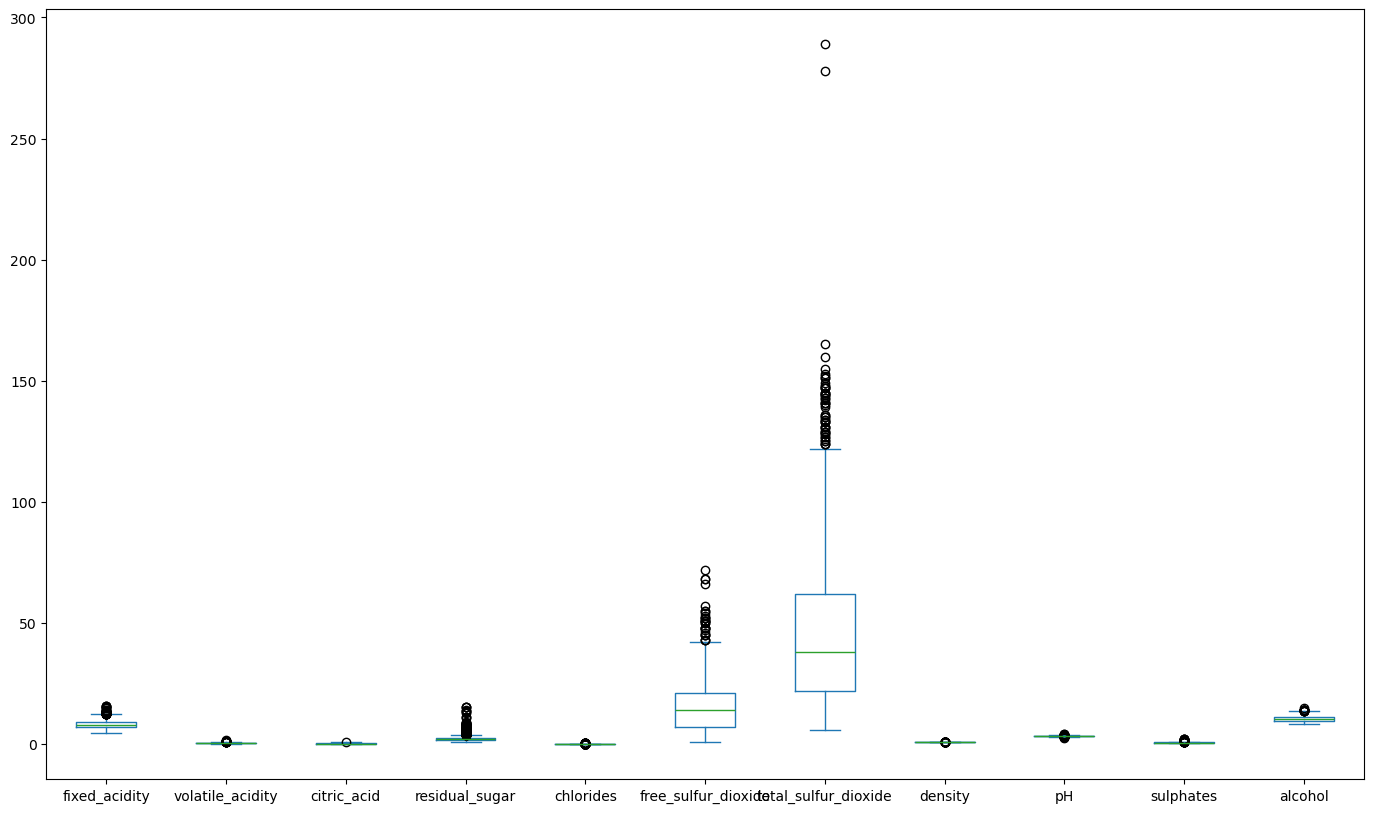

In [46]:
cols_f = winequality_df.iloc[:, :11]
cols_f.plot(kind="box", subplots=True, layout=(3, 9), sharex=False, sharey=False, figsize=(20,10))
cols_f.plot(kind="box", figsize=(17,10))
plt.savefig("abc.pdf")